In [1]:
# Pick up package from parent folder
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(
    inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import sklearn
from sklearn import metrics
import time

import gensim.downloader as model_api

import ordinal
from ordinal import OrderedProbitRanker
from ordinal import OrderedLogitRanker

In [3]:
def fitscore(model, X, y):
    start = time.time()
    model.fit(X, y)
    pred_val = model.predict(X)
    print("time: ", time.time() - start)
    print("score: ", metrics.accuracy_score(pred_val, y))
    print("mse: ", metrics.mean_squared_error(pred_val, y))
    print("mae: ", metrics.mean_absolute_error(pred_val, y))
    pd.Series(pred_val).hist(bins=N_CLASSES)

# Boston prepro

In [37]:
from sklearn.datasets import load_boston, load_diabetes, load_linnerud
from sklearn.preprocessing import KBinsDiscretizer

N_CLASSES = 15

boston = load_boston()
X = boston['data']
y = boston['target']
kbd = KBinsDiscretizer(n_bins=N_CLASSES, encode='ordinal', strategy='kmeans')
y = kbd.fit_transform(y.reshape(-1, 1)).flatten().astype(np.int32)

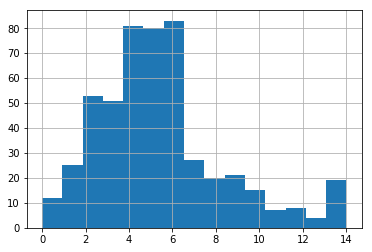

In [34]:
pd.Series(y).hist(bins=N_CLASSES)

time:  0.05221152305603027
score:  0.4644268774703557
mse:  2.2707509881422925
mae:  0.9229249011857708


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


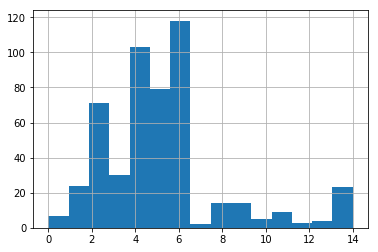

In [6]:
lr = sklearn.linear_model.LogisticRegression(C=9999, solver='lbfgs', multi_class='auto', max_iter=10000)
fitscore(lr, X, y)

time:  10.015806198120117
score:  0.40118577075098816
mse:  1.8873517786561265
mae:  0.8675889328063241


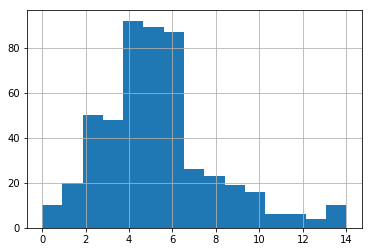

In [7]:
lat = mord.LogisticAT(alpha=1, verbose=1, max_iter=10000000)
fitscore(lat, X, y)

time:  9.931273221969604
score:  0.41699604743083
mse:  2.630434782608696
mae:  0.9822134387351779


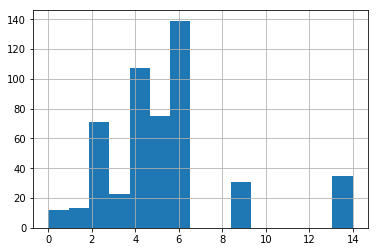

In [8]:
lit = mord.LogisticIT(alpha=1, verbose=1, max_iter=10000000)
fitscore(lit, X, y)

time:  13.535334348678589
score:  0.36363636363636365
mse:  1.8873517786561265
mae:  0.9268774703557312


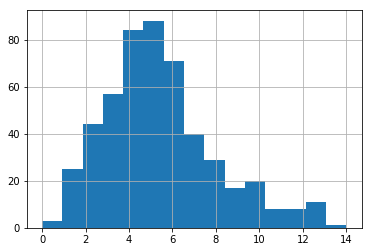

In [9]:
lse = mord.LogisticSE(alpha=1, verbose=1, max_iter=100000000)
fitscore(lse, X, y)

time:  21.525575876235962
score:  0.28063241106719367
mse:  8.889328063241107
mae:  1.8695652173913044


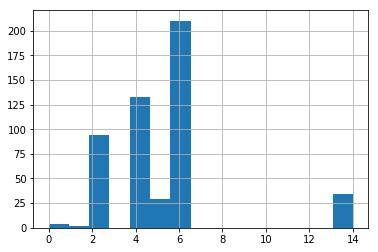

In [35]:
opr = OrderedProbitRanker(method='nelder-mead', use_grad=False)
fitscore(opr, X, y)

# Diabetes Prepro

In [44]:
diabetes = load_diabetes()
Xd = diabetes['data']
yd = diabetes['target']
kbd = KBinsDiscretizer(n_bins=N_CLASSES, encode='ordinal', strategy='kmeans')
yd = kbd.fit_transform(yd.reshape(-1, 1)).flatten().astype(np.int32)

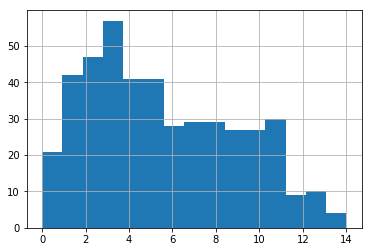

In [56]:
pd.Series(yd).hist(bins=N_CLASSES)

time:  0.419506311416626
score:  0.2692307692307692
mse:  8.746606334841628
mae:  2.1040723981900453


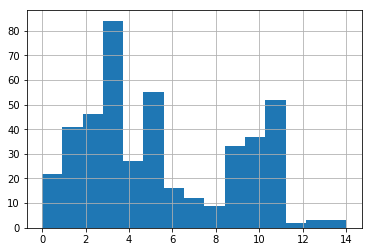

In [51]:
lr = sklearn.linear_model.LogisticRegression(C=9999, solver='lbfgs', multi_class='auto', max_iter=10000)
fitscore(lr, Xd, yd)

time:  0.16927337646484375
score:  0.14479638009049775
mse:  6.760180995475113
mae:  2.063348416289593


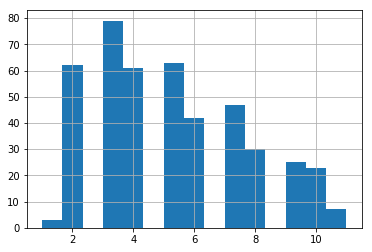

In [52]:
lat = mord.LogisticAT(alpha=1, verbose=1, max_iter=10000000)
fitscore(lat, Xd, yd)

time:  0.09398841857910156
score:  0.18099547511312217
mse:  11.561085972850679
mae:  2.502262443438914


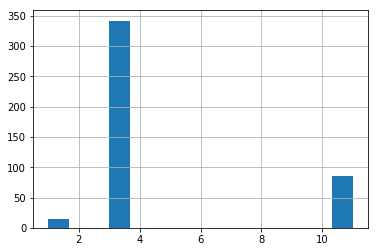

In [53]:
lit = mord.LogisticIT(alpha=1, verbose=1, max_iter=10000000)
fitscore(lit, Xd, yd)

time:  0.29593968391418457
score:  0.14479638009049775
mse:  6.48868778280543
mae:  2.0361990950226243


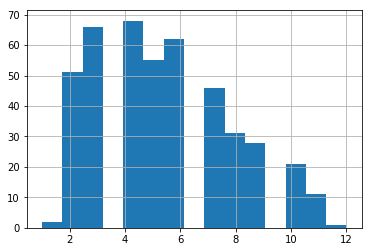

In [54]:
lse = mord.LogisticSE(alpha=1, verbose=1, max_iter=100000000)
fitscore(lse, Xd, yd)

time:  10.89030933380127
score:  0.13574660633484162
mse:  18.167420814479637
mae:  3.226244343891403


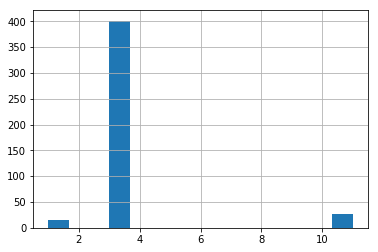

In [55]:
opr = OrderedProbitRanker(method='nelder-mead', use_grad=False)
fitscore(opr, Xd, yd)

# Testing

In [22]:
opr = OrderedProbitRanker(method='BFGS', use_grad=False)
start = time.time()
opr.fit(X, y)
pred_val = opr.predict(X)
print("time: ", time.time() - start)
print("score: ", metrics.accuracy_sczre(pred_val, y))
print("cuts: ", opr.cuts_)

res:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

RuntimeWarning: divide by zero encountered in log

In [23]:
out = pd.Series(opr.res)
ymk = pd.DataFrame(opr.ymasks.T)
pdf = pd.DataFrame(opr.pdf.T)
cdf = pd.DataFrame(opr.cdf.T)
bad = (out < 0.00001)

In [26]:
opr.betas[:opr.ymasks.shape[0] - 1]

array([-3.49865204, -1.16589498,  1.16639642,  3.49959878])

In [27]:
opr.betas

array([-3.49865204e+00, -1.16589498e+00,  1.16639642e+00,  3.49959878e+00,
       -1.81646583e-02,  1.61189187e-02, -2.95223220e-02,  5.35159493e-05,
       -1.01105231e-03, -7.43818066e-03, -1.46405082e-01, -3.02574134e-03,
       -2.78788177e-02, -9.16148878e-01, -3.09399317e-02, -3.93197033e-01,
       -3.83259145e-02])

In [29]:
xb

array([-437.31770047, -390.54856184, -386.15207643, -366.16844483,
       -368.38417829, -367.93926907, -451.40222858, -456.49327688,
       -453.43686207, -450.91585387, -454.5615514 , -454.33450481,
       -445.48070564, -447.75405625, -444.51743678, -446.48133504,
       -438.98684205, -446.92398656, -401.76293237, -446.65493411,
       -445.56963141, -450.26281298, -452.54263027, -452.86778339,
       -451.78163565, -414.81372807, -444.30550814, -416.46637978,
       -449.18371424, -445.08610863, -438.59631729, -445.61161646,
       -386.86621493, -438.01366257, -394.94678746, -422.98662281,
       -414.45291474, -419.04413972, -416.07981573, -389.38159897,
       -388.41285311, -366.5267239 , -366.29926195, -370.7082846 ,
       -373.69849126, -375.76511368, -375.84399653, -382.03319786,
       -385.56026137, -380.12657976, -385.88973516, -387.64359628,
       -382.50536943, -382.66613296, -592.98207602, -365.4781786 ,
       -447.58112498, -394.21224777, -418.99208274, -424.15828

In [30]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [28]:
ymasks = np.array([np.array(y == c_) for c_ in opr.classes_])

n_cuts = len(opr.classes_) - 1
n_samples = X.shape[0]
n_features = X.shape[1]

betas = opr.betas

xb = X @ betas[n_cuts:]
# cdf up to cutpoints
cdf_areas = [norm.cdf(betas[i] - xb) for i in range(n_cuts)]
# last cdf area is from last cutpoint on
cdf_areas.append(cdf_areas[-1])
cdf_areas = np.array(cdf_areas)
# pdf areas between cutpoints = cdf[i] - cdf[i-1]
pdf_areas = np.empty_like(ymasks, dtype='float')
# first is cdf[cut_0] - 0
pdf_areas[0] = cdf_areas[0]
# last is 1 - cdf[last_cut]
pdf_areas[-1] = 1 - cdf_areas[-1]
# middle cuts are cdf area between each
for i in range(1, n_cuts):
    pdf_areas[i] = cdf_areas[i] - cdf_areas[i-1]
res = np.zeros(n_samples)
for i in range(len(ymasks)):
    res += (ymasks[i] * pdf_areas[i])
    
res

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.